Problem 1:Predict the next number

`For a given set of x,y create a program to calculate the next number for a given y.`




Prediction for y = 212.03: x ≈ 47.21, Actual x = 48
Prediction for y = 222.78: x ≈ 49.95, Actual x = 49


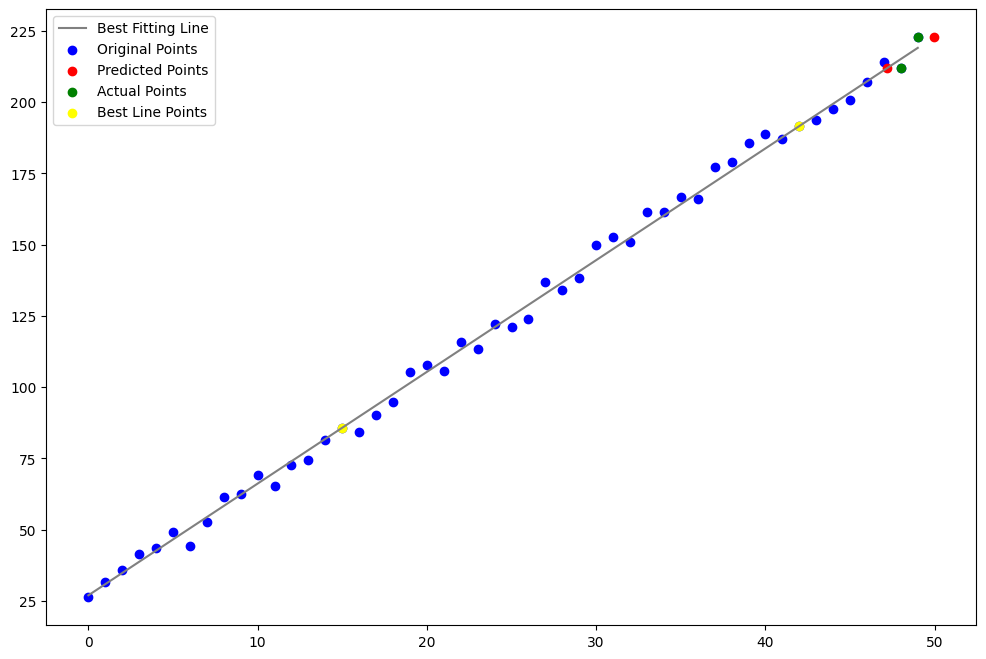

In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random


# Calculate slope and intercept from two points
def line_equation(x1, y1, x2, y2):
    if x1 == x2:
        return None, x1  # Vertical line with constant x
    m = (y2 - y1) / (x2 - x1)
    c = y1 - m * x1
    return m, c


# Calculate perpendicular distance from a point to the line
def calculate_distance_from_line(m, c, x, y):
    if m is None:  # Vertical line
        return abs(x - c)
    return abs(m * x - y + c) / math.sqrt(m**2 + 1)


# Calculate mean distance of all points from the line
def calculate_mean_distance(points, m, c):
    if m is None:
        return sum(abs(x - c) for x, y in points) / len(points)
    return sum(calculate_distance_from_line(m, c, x, y) for x, y in points) / len(points)


# Find the best-fitting line by minimizing mean distance
def find_best_fitting_line(points):
    min_mean_distance = float('inf')
    best_line, line_pair = None, None

    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            (x1, y1), (x2, y2) = points[i], points[j]
            m, c = line_equation(x1, y1, x2, y2)
            remaining_points = [pt for pt in points if pt != (x1, y1) and pt != (x2, y2)]
            mean_distance = calculate_mean_distance(remaining_points, m, c)

            if mean_distance < min_mean_distance:
                min_mean_distance = mean_distance
                best_line, line_pair = (m, c), [(x1, y1), (x2, y2)]

    return best_line, min_mean_distance, line_pair


# Predict x for a given y using the line equation
def predict_x(line, y):
    m, c = line
    if m is None:  # Vertical line
        return c
    if m == 0:  # Horizontal line
        return None
    return (y - c) / m


# Plot points and best-fitting line
def plot_points(line, finalpoints, predicted_points, actual_points, xx, yy):
    plt.figure(figsize=(12, 8))

    # Plot best-fitting line
    if line[0] is not None:
        x_vals = np.linspace(min(xx), max(xx), 400)
        y_vals = line[0] * x_vals + line[1]
    else:
        x_vals = np.full(400, line[1])
        y_vals = np.linspace(min(yy), max(yy), 400)

    plt.plot(x_vals, y_vals, color='gray', label="Best Fitting Line")
    plt.scatter(xx, yy, color="blue", label="Original Points")
    plt.scatter(predicted_points[0], predicted_points[1], color="red", label="Predicted Points")
    plt.scatter(actual_points[0], actual_points[1], color="green", label="Actual Points")
    plt.scatter(*zip(*finalpoints), color="yellow", label="Best Line Points")

    plt.legend()
    plt.show()


# Generate random data points
def generate_data(n_points=50, slope=4, intercept=20, noise=10):
    random.seed(5)
    xx, yy = [], []
    for x in range(n_points):
        y = slope * x + intercept + noise * random.random()
        xx.append(x)
        yy.append(y)
    return list(zip(xx, yy)), xx, yy


# Main driver function
def main():
    # Generate data points
    all_points, xx, yy = generate_data()

    # Use all points except the last 2 for training
    points = all_points[:-2]

    # Find best-fitting line and predict next x values
    best_line, mean_distance, finalpoints = find_best_fitting_line(points)

    # Predict x for the last 2 y-values
    y1, y2 = all_points[-2][1], all_points[-1][1]
    x1, x2 = predict_x(best_line, y1), predict_x(best_line, y2)

    print(f"Prediction for y = {y1:.2f}: x ≈ {x1:.2f}, Actual x = {all_points[-2][0]}")
    print(f"Prediction for y = {y2:.2f}: x ≈ {x2:.2f}, Actual x = {all_points[-1][0]}")

    # Plot the results
    predicted_points = [(x1, x2), (y1, y2)]
    actual_points = [(all_points[-2][0], all_points[-1][0]), (y1, y2)]
    plot_points(best_line, finalpoints, predicted_points, actual_points, xx, yy)


if __name__ == "__main__":
    main()


**Decoder**